In [1]:
#Importing my usual copy and paste
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 as sq
import seaborn as sns
import statistics as st
import datetime

In [2]:
anime_df = pd.read_csv('./Data/anime.csv')

In [3]:
manga_df = pd.read_csv('./Data/manga.csv')

In [4]:
anime_df.head(5)

,mal_id,title,type,score,scored_by,status,episodes,airing_from,airing_to,source,...,synopsis,background,mal_created_at,mal_updated_at,picture_url,mal_url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,TV,9.13,1865027,Finished Airing,64.0,2009-04-05,2010-07-04,Manga,...,After a horrific alchemy experiment goes wrong...,NaN,2008-08-21 03:35:22+00:00,2022-04-18 05:06:13+00:00,https://api-cdn.myanimelist.net/images/anime/1...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),TV,9.05,1502709,Finished Airing,148.0,2011-10-02,2014-09-24,Manga,...,Hunters devote themselves to accomplishing haz...,NaN,2011-07-27 08:41:39+00:00,2022-04-18 05:11:21+00:00,https://api-cdn.myanimelist.net/images/anime/1...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,TV,9.07,1322101,Finished Airing,10.0,2019-04-29,2019-07-01,Manga,...,Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,2018-10-14 18:13:45+00:00,2022-04-18 05:02:23+00:00,https://api-cdn.myanimelist.net/images/anime/1...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,TV,9.08,1248451,Finished Airing,24.0,2011-04-06,2011-09-14,Visual novel,...,Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' re...,2010-07-26 09:23:40+00:00,2022-05-01 21:24:42+00:00,https://api-cdn.myanimelist.net/images/anime/5...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,Movie,8.95,1392476,Finished Airing,1.0,2016-09-17,2016-09-17,Manga,...,"As a wild youth, elementary school student Sho...",Winner of the Excellence Award on the 20th Jap...,2014-12-15 08:00:46+00:00,2022-04-18 04:55:56+00:00,https://api-cdn.myanimelist.net/images/anime/1...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


In [47]:
manga_df.keys()

Index(['id', 'title', 'media_type', 'mean', 'num_scoring_users', 'status',
       'num_volumes', 'num_chapters', 'start_date', 'end_date',
       'num_list_users', 'popularity', 'num_favorites', 'rank', 'genres',
       'authors', 'synopsis', 'nsfw', 'created_at', 'updated_at',
       'main_picture_medium', 'main_picture_large', 'alternative_titles_en',
       'alternative_titles_ja', 'alternative_titles_synonyms'],
      dtype='object')

In [5]:
manga_df.head(5)

,id,title,media_type,mean,num_scoring_users,status,num_volumes,num_chapters,start_date,end_date,...,authors,synopsis,nsfw,created_at,updated_at,main_picture_medium,main_picture_large,alternative_titles_en,alternative_titles_ja,alternative_titles_synonyms
0,23390,Shingeki no Kyojin,manga,8.57,361834,finished,34.0,141.0,2009-09-09,2021-04-09,...,"['Isayama, Hajime (Story & Art)']","Hundreds of years ago, horrifying creatures wh...",white,1970-01-01 00:00:00+00:00,2022-04-18 05:10:58+00:00,https://api-cdn.myanimelist.net/images/manga/2...,https://api-cdn.myanimelist.net/images/manga/2...,Attack on Titan,進撃の巨人,[]
1,2,Berserk,manga,9.45,266303,currently_publishing,NaN,NaN,1989-08-25,NaN,...,"['Miura, Kentarou (Story & Art)', 'Studio Gaga...","Guts, a former mercenary now known as the ""Bla...",white,1970-01-01 00:00:00+00:00,2022-06-23 08:30:44+00:00,https://api-cdn.myanimelist.net/images/manga/1...,https://api-cdn.myanimelist.net/images/manga/1...,Berserk,ベルセルク,['Berserk: The Prototype']
2,13,One Piece,manga,9.20,303735,currently_publishing,NaN,NaN,1997-07-22,NaN,...,"['Oda, Eiichiro (Story & Art)']","Gol D. Roger, a man referred to as the ""Pirate...",white,1970-01-01 00:00:00+00:00,2022-04-18 04:48:35+00:00,https://api-cdn.myanimelist.net/images/manga/2...,https://api-cdn.myanimelist.net/images/manga/2...,One Piece,ONE PIECE,[]
3,33327,Tokyo Ghoul,manga,8.52,235494,finished,14.0,144.0,2011-09-08,2014-09-18,...,"['Ishida, Sui (Story & Art)']",Lurking within the shadows of Tokyo are fright...,white,1970-01-01 00:00:00+00:00,2022-04-18 03:30:48+00:00,https://api-cdn.myanimelist.net/images/manga/3...,https://api-cdn.myanimelist.net/images/manga/3...,Tokyo Ghoul,東京喰種トーキョーグール,['Toukyou Kushu']
4,116778,Chainsaw Man,manga,8.73,262318,currently_publishing,NaN,NaN,2018-12-03,NaN,...,"['Fujimoto, Tatsuki (Story & Art)']",Denji has a simple dream—to live a happy and p...,white,1970-01-01 00:00:00+00:00,2022-07-12 15:40:41+00:00,https://api-cdn.myanimelist.net/images/manga/3...,https://api-cdn.myanimelist.net/images/manga/3...,Chainsaw Man,チェンソーマン,[]


In [6]:
anime_df.describe()

,mal_id,score,scored_by,episodes,members,favorites,start_year
count,20741.000000,14257.000000,2.074100e+04,20199.000000,2.074100e+04,20741.000000,17719.000000
mean,25590.656044,6.456695,2.042868e+04,12.929551,3.969594e+04,466.691673,2007.521531
std,16759.215402,0.899437,9.423197e+04,47.639882,1.559821e+05,4393.777635,13.485452
min,1.000000,1.840000,0.000000e+00,1.000000,0.000000e+00,0.000000,1917.000000
25%,7960.000000,5.850000,7.200000e+01,1.000000,3.030000e+02,0.000000,2002.000000
50%,30166.000000,6.470000,4.980000e+02,2.000000,1.728000e+03,2.000000,2012.000000
75%,39478.000000,7.110000,4.502000e+03,12.000000,1.232500e+04,24.000000,2017.000000
max,52367.000000,9.150000,2.475800e+06,3057.000000,3.461461e+06,204080.000000,2023.000000


In [7]:
manga_df.describe()

,id,mean,num_scoring_users,num_volumes,num_chapters,num_list_users,popularity,num_favorites,rank
count,59767.000000,21806.000000,59767.000000,45751.000000,42560.000000,59767.000000,59767.000000,59767.000000,41186.000000
mean,70810.155889,6.969102,652.185738,2.960460,20.259234,1639.635819,29884.000000,53.243563,20593.879279
std,45209.999192,0.516257,5031.803636,4.782599,53.004074,10126.247479,17253.391106,974.993680,11889.926209
min,1.000000,2.440000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000
25%,23806.500000,6.640000,6.000000,1.000000,5.000000,56.000000,14942.500000,0.000000,10297.250000
50%,77273.000000,6.940000,40.000000,1.000000,9.000000,166.000000,29884.000000,0.000000,20593.500000
75%,107808.500000,7.270000,246.000000,3.000000,18.000000,716.000000,44825.500000,3.000000,30890.750000
max,149244.000000,9.450000,361834.000000,200.000000,6477.000000,588155.000000,59767.000000,103023.000000,41187.000000


In [8]:
anime_df.info()
#Remove stuff thats not scored
#Keep Title, Type, Score, Status, Airing_From, Source, Rating, SFW, Start_Year, Genres, Studios, Producers
#Seems easier to just list the columns to keep as opposed to dropping columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20741 entries, 0 to 20740
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mal_id            20741 non-null  int64  
 1   title             20741 non-null  object 
 2   type              20686 non-null  object 
 3   score             14257 non-null  float64
 4   scored_by         20741 non-null  int64  
 5   status            20741 non-null  object 
 6   episodes          20199 non-null  float64
 7   airing_from       20340 non-null  object 
 8   airing_to         19399 non-null  object 
 9   source            20741 non-null  object 
 10  members           20741 non-null  int64  
 11  favorites         20741 non-null  int64  
 12  episode_duration  20139 non-null  object 
 13  rating            20196 non-null  object 
 14  sfw               20741 non-null  bool   
 15  start_year        17719 non-null  float64
 16  start_season      17719 non-null  object

In [9]:
manga_df.info()
#Keep Title, Media_Type, Mean, Num_Scoring_users, Start_Date, Num_Chapters, Genres, Authors, NSFW
#Seems easier to just list the columns to keep as opposed to dropping columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59767 entries, 0 to 59766
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           59767 non-null  int64  
 1   title                        59767 non-null  object 
 2   media_type                   59767 non-null  object 
 3   mean                         21806 non-null  float64
 4   num_scoring_users            59767 non-null  int64  
 5   status                       59767 non-null  object 
 6   num_volumes                  45751 non-null  float64
 7   num_chapters                 42560 non-null  float64
 8   start_date                   57841 non-null  object 
 9   end_date                     48241 non-null  object 
 10  num_list_users               59767 non-null  int64  
 11  popularity                   59767 non-null  int64  
 12  num_favorites                59767 non-null  int64  
 13  rank            

In [10]:
anime2 = anime_df[['title', 'type', 'score', 'status', 'airing_from', 'source', 'rating', 'sfw', 'start_year', 'genres', 'studios', 'producers']]

In [11]:
manga2 = manga_df[['title','media_type','mean','num_scoring_users','num_chapters','start_date','genres','authors','nsfw']]

In [12]:
anime2.head(2)


,title,type,score,status,airing_from,source,rating,sfw,start_year,genres,studios,producers
0,Fullmetal Alchemist: Brotherhood,TV,9.13,Finished Airing,2009-04-05,Manga,R - 17+ (violence & profanity),True,2009.0,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,Hunter x Hunter (2011),TV,9.05,Finished Airing,2011-10-02,Manga,PG-13 - Teens 13 or older,True,2011.0,"['Action', 'Adventure', 'Fantasy']",['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']"


In [13]:
manga2.head(2)

,title,media_type,mean,num_scoring_users,num_chapters,start_date,genres,authors,nsfw
0,Shingeki no Kyojin,manga,8.57,361834,141.0,2009-09-09,"['Action', 'Award Winning', 'Drama', 'Gore', '...","['Isayama, Hajime (Story & Art)']",white
1,Berserk,manga,9.45,266303,NaN,1989-08-25,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Miura, Kentarou (Story & Art)', 'Studio Gaga...",white


In [14]:
manga2['nsfw'].value_counts()
#I wonder what NSFW is separated into

white    38473
gray     21294
Name: nsfw, dtype: int64

In [15]:
manga2.loc[manga2['title'] == 'Berserk']
#Whys Berserk Num_Ch so low, shambles whatever sorry Kentaro

,title,media_type,mean,num_scoring_users,num_chapters,start_date,genres,authors,nsfw
1,Berserk,manga,9.45,266303,NaN,1989-08-25,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Miura, Kentarou (Story & Art)', 'Studio Gaga...",white


In [16]:
anime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20741 entries, 0 to 20740
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        20741 non-null  object 
 1   type         20686 non-null  object 
 2   score        14257 non-null  float64
 3   status       20741 non-null  object 
 4   airing_from  20340 non-null  object 
 5   source       20741 non-null  object 
 6   rating       20196 non-null  object 
 7   sfw          20741 non-null  bool   
 8   start_year   17719 non-null  float64
 9   genres       20741 non-null  object 
 10  studios      20741 non-null  object 
 11  producers    20741 non-null  object 
dtypes: bool(1), float64(2), object(9)
memory usage: 1.8+ MB


In [17]:
manga2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59767 entries, 0 to 59766
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              59767 non-null  object 
 1   media_type         59767 non-null  object 
 2   mean               21806 non-null  float64
 3   num_scoring_users  59767 non-null  int64  
 4   num_chapters       42560 non-null  float64
 5   start_date         57841 non-null  object 
 6   genres             59767 non-null  object 
 7   authors            59767 non-null  object 
 8   nsfw               59767 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 4.1+ MB


In [18]:
anime3 = anime2[anime2['score'].notna()]

In [19]:
manga3 = manga2[manga2['mean'].notna()]

In [20]:
anime3.info()
#you know what, fudge it lets just drop all nulls the data sets are large enough

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14257 entries, 0 to 14256
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        14257 non-null  object 
 1   type         14256 non-null  object 
 2   score        14257 non-null  float64
 3   status       14257 non-null  object 
 4   airing_from  14246 non-null  object 
 5   source       14257 non-null  object 
 6   rating       14162 non-null  object 
 7   sfw          14257 non-null  bool   
 8   start_year   13546 non-null  float64
 9   genres       14257 non-null  object 
 10  studios      14257 non-null  object 
 11  producers    14257 non-null  object 
dtypes: bool(1), float64(2), object(9)
memory usage: 1.3+ MB


In [21]:
manga3.info()
#you know what, fudge it lets just drop all nulls the data sets are large enough

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21806 entries, 0 to 29208
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              21806 non-null  object 
 1   media_type         21806 non-null  object 
 2   mean               21806 non-null  float64
 3   num_scoring_users  21806 non-null  int64  
 4   num_chapters       17956 non-null  float64
 5   start_date         20923 non-null  object 
 6   genres             21806 non-null  object 
 7   authors            21806 non-null  object 
 8   nsfw               21806 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


In [22]:
anime3 = anime3.dropna()

In [23]:
manga3 = manga3.dropna()

In [24]:
m1 = manga3.loc[manga3['num_chapters'] >= 10]
#Dropping stuff thats less than 10 chapters, we don't care about one shot or failures!!!

In [25]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8584 entries, 0 to 27474
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              8584 non-null   object 
 1   media_type         8584 non-null   object 
 2   mean               8584 non-null   float64
 3   num_scoring_users  8584 non-null   int64  
 4   num_chapters       8584 non-null   float64
 5   start_date         8584 non-null   object 
 6   genres             8584 non-null   object 
 7   authors            8584 non-null   object 
 8   nsfw               8584 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 670.6+ KB


In [26]:
m1['start_year'] = m1.start_date.str[:4]
#this makes the year in a new column

<ipython-input-26-3c1ba78c1d40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1['start_year'] = m1.start_date.str[:4]


In [27]:
m1.head(5)
#nice

,title,media_type,mean,num_scoring_users,num_chapters,start_date,genres,authors,nsfw,start_year
0,Shingeki no Kyojin,manga,8.57,361834,141.0,2009-09-09,"['Action', 'Award Winning', 'Drama', 'Gore', '...","['Isayama, Hajime (Story & Art)']",white,2009
3,Tokyo Ghoul,manga,8.52,235494,144.0,2011-09-08,"['Action', 'Fantasy', 'Gore', 'Horror', 'Psych...","['Ishida, Sui (Story & Art)']",white,2011
7,Naruto,manga,8.06,251848,700.0,1999-09-21,"['Action', 'Adventure', 'Fantasy', 'Martial Ar...","['Kishimoto, Masashi (Story & Art)']",white,1999
9,Death Note,manga,8.70,205249,108.0,2003-12-01,"['Psychological', 'Shounen', 'Supernatural', '...","['Obata, Takeshi (Art)', 'Ohba, Tsugumi (Story)']",white,2003
10,Kimetsu no Yaiba,manga,8.28,218425,207.0,2016-02-15,"['Action', 'Fantasy', 'Historical', 'Shounen']","['Gotouge, Koyoharu (Story & Art)']",white,2016


In [28]:
m1['start_year'].value_counts()
#Lets cull stuff older than 1990

2011    543
2013    521
2012    519
2009    485
2010    469
       ... 
1950      1
1956      1
1964      1
1958      1
1946      1
Name: start_year, Length: 67, dtype: int64

In [29]:
m1 = m1.loc[m1['start_year'].astype(int) >= 1980]

In [30]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8452 entries, 0 to 27474
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              8452 non-null   object 
 1   media_type         8452 non-null   object 
 2   mean               8452 non-null   float64
 3   num_scoring_users  8452 non-null   int64  
 4   num_chapters       8452 non-null   float64
 5   start_date         8452 non-null   object 
 6   genres             8452 non-null   object 
 7   authors            8452 non-null   object 
 8   nsfw               8452 non-null   object 
 9   start_year         8452 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 726.3+ KB


In [31]:
m1_years = m1.groupby(['start_year']).mean().sort_values(by='start_year', ascending=True).reset_index()

In [32]:
m1_yearscount = m1.groupby(['start_year']).count().sort_values(by='start_year', ascending=True).reset_index()
#seeing the count
m1_yearscount2 = m1_yearscount[['start_year','title']]

In [33]:
m1_years
#Sick this will be good to track trends of years, mean, trends, etc.

,start_year,mean,num_scoring_users,num_chapters
0,1980,7.494286,1963.428571,94.428571
1,1981,7.135455,1039.181818,71.545455
2,1982,7.403571,4519.428571,103.642857
3,1983,7.505000,2200.500000,203.375000
4,1984,7.297692,7091.538462,117.384615
5,1985,7.188500,1583.350000,110.200000
6,1986,7.134091,3451.909091,87.727273
7,1987,7.285833,5242.083333,117.041667
8,1988,7.254400,1008.440000,107.760000
9,1989,7.147333,4300.666667,67.900000


In [34]:
m1_years2 = pd.merge(m1_years, m1_yearscount2, on='start_year', how='inner')
m1_years2['num_of_mangas'] = m1_years2['title']
del m1_years2['title']

In [35]:
m1_years2

,start_year,mean,num_scoring_users,num_chapters,num_of_mangas
0,1980,7.494286,1963.428571,94.428571,7
1,1981,7.135455,1039.181818,71.545455,11
2,1982,7.403571,4519.428571,103.642857,14
3,1983,7.505000,2200.500000,203.375000,8
4,1984,7.297692,7091.538462,117.384615,13
5,1985,7.188500,1583.350000,110.200000,20
6,1986,7.134091,3451.909091,87.727273,22
7,1987,7.285833,5242.083333,117.041667,24
8,1988,7.254400,1008.440000,107.760000,25
9,1989,7.147333,4300.666667,67.900000,30


In [50]:
# genres to list 
m1['genres'] = m1.genres.str.replace('[','')
m1['genres'] = m1.genres.str.replace(']','')
m1['genres'] = m1.genres.str.replace("'",'')
m1['genres'] = m1.genres.str.replace(" ",'')
m1['genres'] = m1['genres'].str.split(",")
# explode out rows for movies with multiple genres
m1 = m1.explode('genres')
#creating a new groupby
m2_g = m1.groupby('genres').filter(lambda x: len(x) > 200)
#gotta remove the tiny genres cause I was getting like 100+ genres

In [37]:
m2_genres = m2_g.groupby(['genres']).mean().sort_values(by='mean', ascending=False).reset_index()
#seeing the groupby/means

In [38]:
m2_genrescount = m2_g.groupby(['genres']).count().sort_values(by='mean', ascending=False).reset_index()
m2_genrescount2 = m2_genrescount[['genres','title']]

In [39]:
m2_genres2 = pd.merge(m2_genres, m2_genrescount2, on='genres', how='inner')
m2_genres2['count'] = m2_genres2['title']
del m2_genres2['title']
m2_genres2

,genres,mean,num_scoring_users,num_chapters,count
0,AwardWinning,7.835189,15961.438679,157.301887,212
1,Historical,7.323811,3697.186486,60.121622,370
2,Drama,7.277367,3955.621382,54.276844,2142
3,Psychological,7.253396,7118.134172,53.566038,477
4,Mystery,7.244511,3796.951140,47.822476,614
5,BoysLove,7.234807,1259.406998,21.615101,543
6,Shoujo,7.232337,2628.856050,34.050765,1438
7,SliceofLife,7.218178,2402.028659,50.682702,977
8,Adventure,7.201076,4781.420983,62.269588,753
9,Sports,7.154062,2750.888393,99.714286,224


In [40]:
m2_genres2
#Nice I think we can make some charts

,genres,mean,num_scoring_users,num_chapters,count
0,AwardWinning,7.835189,15961.438679,157.301887,212
1,Historical,7.323811,3697.186486,60.121622,370
2,Drama,7.277367,3955.621382,54.276844,2142
3,Psychological,7.253396,7118.134172,53.566038,477
4,Mystery,7.244511,3796.951140,47.822476,614
5,BoysLove,7.234807,1259.406998,21.615101,543
6,Shoujo,7.232337,2628.856050,34.050765,1438
7,SliceofLife,7.218178,2402.028659,50.682702,977
8,Adventure,7.201076,4781.420983,62.269588,753
9,Sports,7.154062,2750.888393,99.714286,224


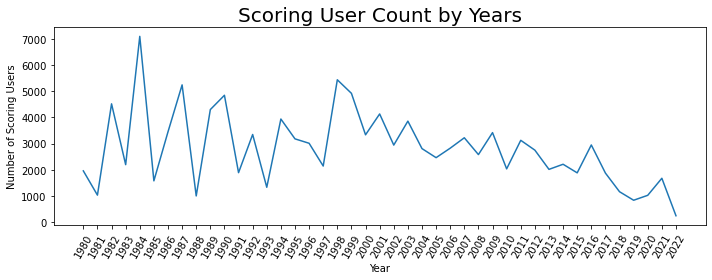

In [41]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot('start_year', 'num_scoring_users', data=m1_years2)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Scoring Users')
ax.set_title('Scoring User Count by Years', fontsize=20)
plt.xticks(rotation = 60)
plt.tight_layout()
plt.savefig('./Charts/' + 'UserCountYears.png', bbox_inches='tight')

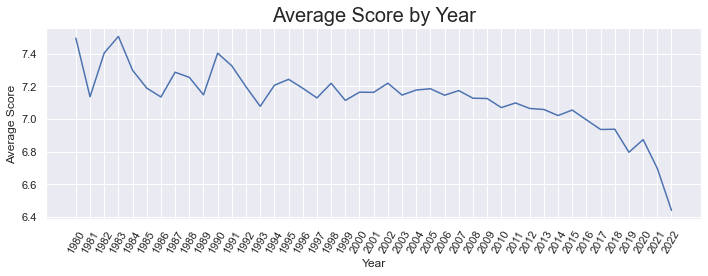

In [54]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot('start_year', 'mean', data=m1_years2)
ax.set_xlabel('Year')
ax.set_ylabel('Average Score')
ax.set_title('Average Score by Year', fontsize=20)
plt.xticks(rotation = 60)
plt.tight_layout()
plt.savefig('./Charts/' + 'UserCountYears.png', bbox_inches='tight')

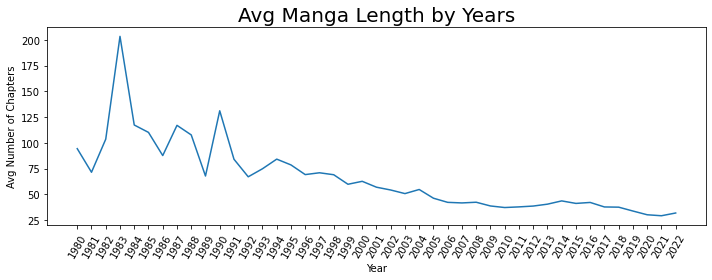

In [42]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot('start_year', 'num_chapters', data=m1_years2)
ax.set_xlabel('Year')
ax.set_ylabel('Avg Number of Chapters')
ax.set_title('Avg Manga Length by Years', fontsize=20)
plt.xticks(rotation = 60)
plt.tight_layout()
plt.savefig('./Charts/' + 'ChaptersYears.png', bbox_inches='tight')

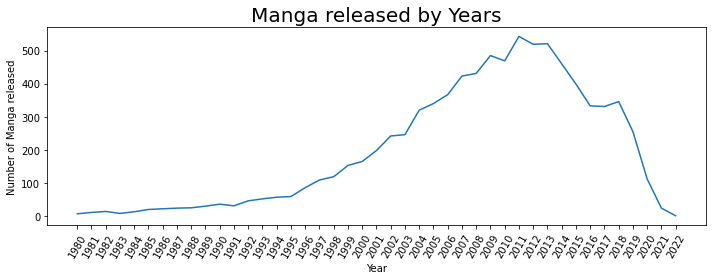

In [43]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot('start_year', 'num_of_mangas', data=m1_years2)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Manga released')
ax.set_title('Manga released by Years', fontsize=20)
plt.xticks(rotation = 60)
plt.tight_layout()
plt.savefig('./Charts/' + 'MangasReleasedYears.png', bbox_inches='tight')

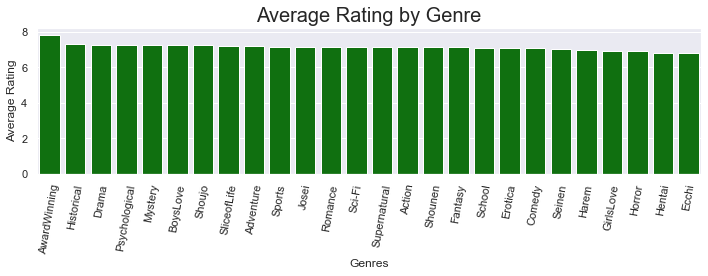

In [52]:
ax = sns.barplot(x='genres', y='mean', data= m2_genres, color='green')
sns.set(rc={'figure.figsize':(10,4)})
ax.set_xlabel('Genres')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating by Genre', fontsize=20)
plt.xticks(rotation = 80)
plt.tight_layout()
plt.savefig('./Charts/' + 'AvgRatingGenre.png', bbox_inches='tight')

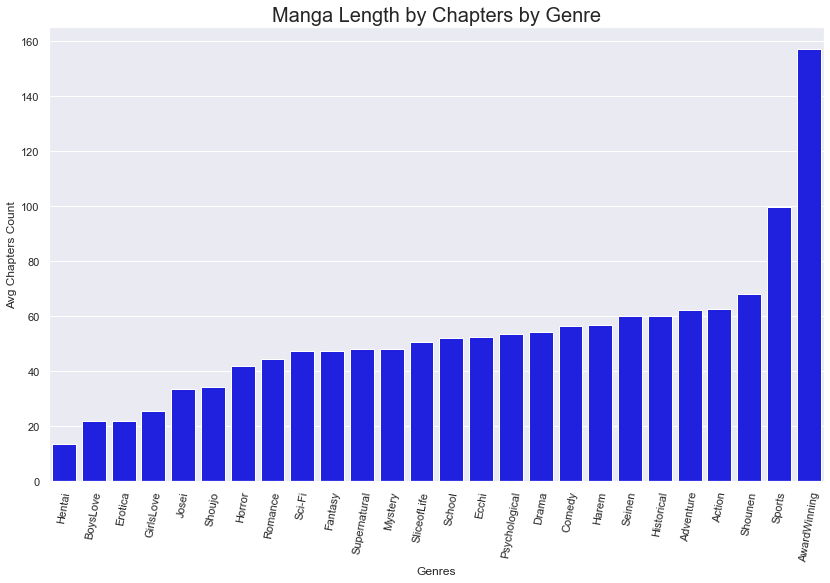

In [51]:
ax = sns.barplot(x='genres', y='num_chapters', data= m2_genres.sort_values(by='num_chapters', ascending=True), color='blue')
sns.set(rc={'figure.figsize':(10,4)})
ax.set_xlabel('Genres')
ax.set_ylabel('Avg Chapters Count')
ax.set_title('Manga Length by Chapters by Genre', fontsize=20)
plt.xticks(rotation = 80)
plt.tight_layout()
plt.savefig('./Charts/' + 'MangaLengthGenre.png', bbox_inches='tight')

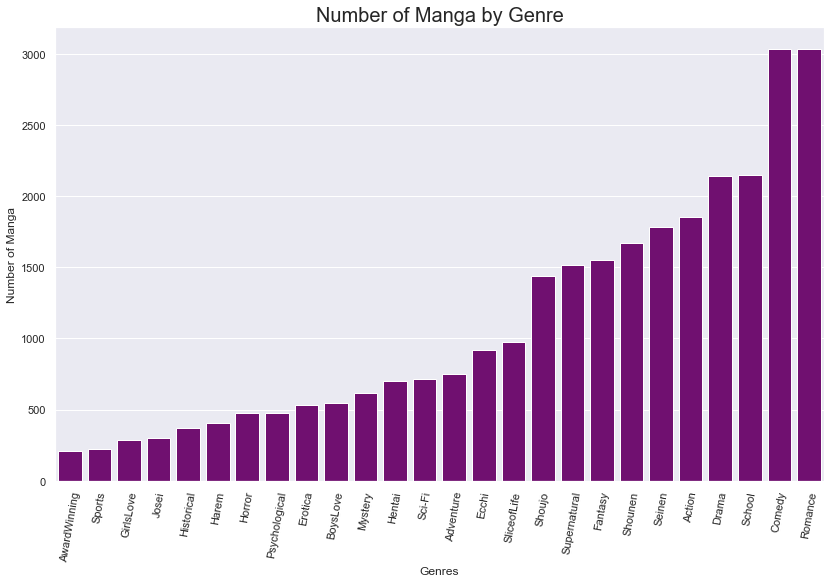

In [46]:
ax = sns.barplot(x='genres', y='count', data= m2_genres2.sort_values(by='count', ascending=True), color='purple')
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Manga')
ax.set_title('Number of Manga by Genre', fontsize=20)
plt.xticks(rotation = 80)
plt.tight_layout()
plt.savefig('./Charts/' + 'MangaGenre.png', bbox_inches='tight')